<a href="https://colab.research.google.com/github/jaekwonkim-hmc/Data-Analysis-with-Open-Source/blob/main/OSDT_Analysis_mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'http://openapi.seoul.go.kr:8088/696d6354746a6165333554747a7744/json/energyUseDataSummaryInfo/1/7/2015/01'
#url = 'http://openapi.seoul.go.kr:8088/sample/xml/CardSubwayStatsNew/1/5/20220301'

#api_key = "696d6354746a6165333554747a7744"
#The the URL request include otions for json, year, month, no of pages & rows. # of rows was changed 5 -> 7

response = requests.get(url)

if response.status_code == 200:
    print("api 호출 성공")
    # Now response.json() should work as the return type is specified as JSON in params
    print(response.json())
else:
    print(f"API 호출 실패: {response.status_code}")


api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [32]:
import requests
import pandas as pd
import json

def get_year_months():
    year_months = []
    for year in range(2015, 2024+1):
        for month in range(1,12+1):
            year_months.append(f'{year}/{month:02d}')
    return year_months

responses = []
apiurl='http://openapi.seoul.go.kr:8088/696d6354746a6165333554747a7744/json/energyUseDataSummaryInfo/1/7/'

for year_month in get_year_months():
    url = apiurl+year_month
    response = requests.get(url)
    if response.status_code == 200:
        print(f"API 호출 성공: {year_month}")
        responses.append(response.json()['energyUseDataSummaryInfo']['row'])
    else:
        print(f"API 호출 실패: {response.status_code}")

print(responses)

API 호출 성공: 2015/01
API 호출 성공: 2015/02
API 호출 성공: 2015/03
API 호출 성공: 2015/04
API 호출 성공: 2015/05
API 호출 성공: 2015/06
API 호출 성공: 2015/07
API 호출 성공: 2015/08
API 호출 성공: 2015/09
API 호출 성공: 2015/10
API 호출 성공: 2015/11
API 호출 성공: 2015/12
API 호출 성공: 2016/01
API 호출 성공: 2016/02
API 호출 성공: 2016/03
API 호출 성공: 2016/04
API 호출 성공: 2016/05
API 호출 성공: 2016/06
API 호출 성공: 2016/07
API 호출 성공: 2016/08
API 호출 성공: 2016/09
API 호출 성공: 2016/10
API 호출 성공: 2016/11
API 호출 성공: 2016/12
API 호출 성공: 2017/01
API 호출 성공: 2017/02
API 호출 성공: 2017/03
API 호출 성공: 2017/04
API 호출 성공: 2017/05
API 호출 성공: 2017/06
API 호출 성공: 2017/07
API 호출 성공: 2017/08
API 호출 성공: 2017/09
API 호출 성공: 2017/10
API 호출 성공: 2017/11
API 호출 성공: 2017/12
API 호출 성공: 2018/01
API 호출 성공: 2018/02
API 호출 성공: 2018/03
API 호출 성공: 2018/04
API 호출 성공: 2018/05
API 호출 성공: 2018/06
API 호출 성공: 2018/07
API 호출 성공: 2018/08
API 호출 성공: 2018/09
API 호출 성공: 2018/10
API 호출 성공: 2018/11
API 호출 성공: 2018/12
API 호출 성공: 2019/01
API 호출 성공: 2019/02
API 호출 성공: 2019/03
API 호출 성공: 2019/04
API 호출 성공: 2

In [33]:
#df = pd.DataFrame(response.json()['response']['body']['items'])
df = pd.DataFrame(responses)
print(df.shape)
print(df.values)
#현년 전기, 가스, 수도, 지역난방 에너지 사용량   EUS  GUS   WUS HUS


(120, 7)
[[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
  {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2': '2133200.8', 'WCO2_1': '-39498.1', 'WCO2_2': '-13113.3692', 'HUS': '0', 'HUS1': '0', 'HUS2': '0', 'HCO2_

In [34]:
# Flatten the list of lists into a single list of dictionaries
single_list = [item for sublist in responses for item in sublist]

# MM_TYPE='개인' 현년 전기, 가스, 수도, 지역난방 에너지 사용량(EUS GUS WUS HUS) 추출

single_list = [item for item in single_list if item.get('MM_TYPE') == '개인']
df_selected = pd.DataFrame(single_list)[["YEAR","MON","MM_TYPE","CNT","EUS", "GUS", "WUS", "HUS"]]

# Display the new DataFrame
display(df_selected)

,YEAR,MON,MM_TYPE,CNT,EUS,GUS,WUS,HUS
0,2015,01,개인,767791,193784708,59133720,12819757.886,22740838.937
1,2015,02,개인,774620,189974230,56487358,12656888.218,18793320.213
2,2015,03,개인,783726,175215719,49984873,12655474.249,13826348.508
3,2015,04,개인,798971,183891769,37306841,12954773.246,5836002.885
4,2015,05,개인,810422,177289769,22060892,13086734.214,1320895.801
...,...,...,...,...,...,...,...,...
115,2024,08,개인,1242696,463971328,7072251,15873544.6,130082.263
116,2024,09,개인,1247288,409872908,5729131,15143321.6,3420507.136
117,2024,10,개인,1249966,282268119,8233421,15297669.9,2695491.396
118,2024,11,개인,1251707,257927956,17418221,14678672.5,8836296.454


In [ ]:

cols_to_convert = ['MON', 'CNT', 'EUS', 'GUS', 'WUS', 'HUS']
df_selected[cols_to_convert] = df_selected[cols_to_convert].apply(pd.to_numeric, errors='coerce')


def get_season(month):
    if 3 <= month <= 5:
        return "봄"
    elif 6 <= month <= 8:
        return "여름"
    elif 9 <= month <= 11:
        return "가을"
    else:
        return "겨울"

df_selected['SEASON'] = df_selected['MON'].apply(get_season)

display(df_selected)

,YEAR,MON,MM_TYPE,CNT,EUS,GUS,WUS,HUS,SEASON
0,2015,1,개인,767791,193784708,59133720,1.281976e+07,2.274084e+07,겨울
1,2015,2,개인,774620,189974230,56487358,1.265689e+07,1.879332e+07,겨울
2,2015,3,개인,783726,175215719,49984873,1.265547e+07,1.382635e+07,봄
3,2015,4,개인,798971,183891769,37306841,1.295477e+07,5.836003e+06,봄
4,2015,5,개인,810422,177289769,22060892,1.308673e+07,1.320896e+06,봄
5,2015,6,개인,813731,186073153,12677645,1.424165e+07,2.943126e+05,여름
6,2015,7,개인,823337,165114568,8893640,1.208388e+07,7.028636e+05,여름
7,2015,8,개인,831008,242000479,7619018,1.516455e+07,4.602890e+05,여름
8,2015,9,개인,836705,207540868,6518422,1.441908e+07,3.057107e+05,가을
9,2015,10,개인,838855,186473958,8924018,1.471183e+07,3.167520e+06,가을


In [ ]:
df_selected.describe()

,MON,CNT,EUS,GUS,WUS,HUS,SUM
count,24.000000,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,6.500000,855287.875000,2.055108e+08,2.913823e+07,1.359730e+07,8.408822e+06,2.566552e+08
std,3.526299,47926.812035,2.801280e+07,2.108534e+07,1.651351e+06,8.942635e+06,3.650295e+07
min,1.000000,767791.000000,1.651146e+08,6.518422e+06,7.215169e+06,2.730398e+04,1.867950e+08
25%,3.750000,820935.500000,1.890992e+08,9.462429e+06,1.305374e+07,6.422200e+05,2.321641e+08
50%,6.500000,855111.500000,2.029647e+08,2.256898e+07,1.375578e+07,3.861959e+06,2.513340e+08
75%,9.250000,896350.000000,2.129768e+08,4.768425e+07,1.457911e+07,1.494130e+07,2.809874e+08
max,12.000000,921883.000000,3.030320e+08,6.887980e+07,1.544290e+07,2.718617e+07,3.268270e+08


In [ ]:
df_selected['SUM']=df_selected['EUS']+df_selected['GUS']+df_selected['WUS']+df_selected['HUS']


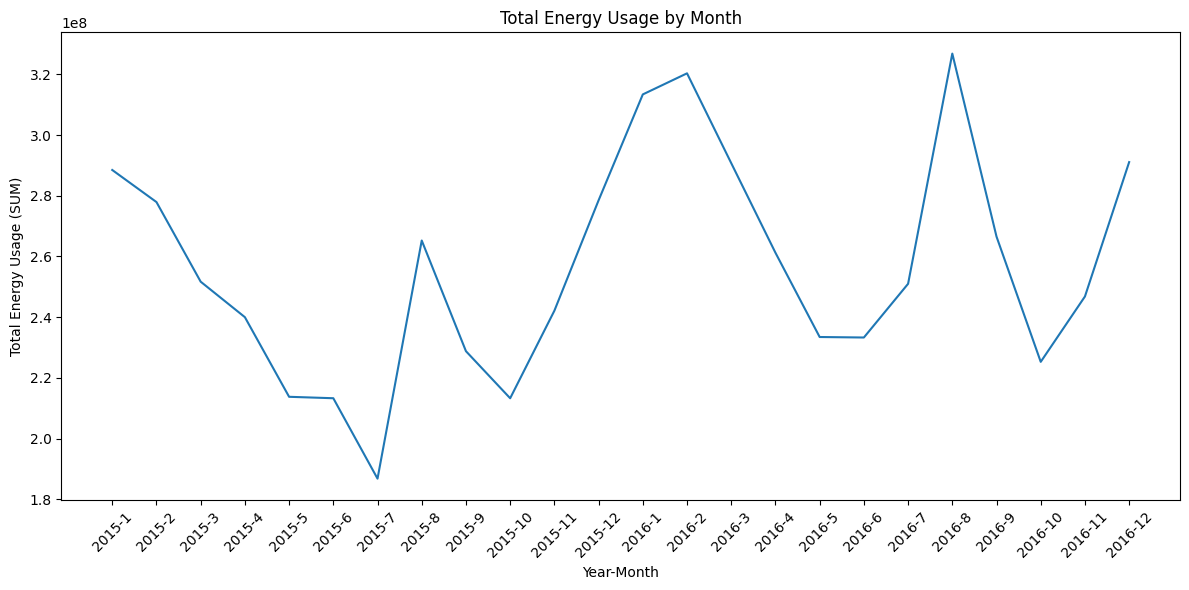

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot of the 'SUM' column over time (Month)
plt.figure(figsize=(12, 6))
plt.plot(df_selected['YEAR'].astype(str) + '-' + df_selected['MON'].astype(str), df_selected['SUM'])
plt.xlabel('Year-Month')
plt.ylabel('Total Energy Usage (SUM)')
plt.title('Total Energy Usage by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_selected.groupby('SEASON')['GUS'].mean()

,GUS
SEASON,
가을,1.280676e+07
겨울,5.485920e+07
봄,3.880331e+07
여름,1.008365e+07


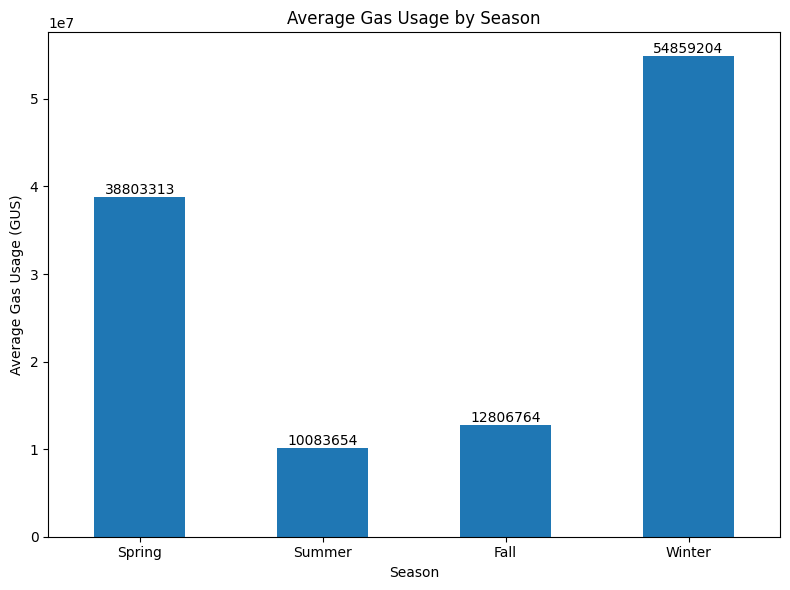

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average GUS by season
average_gus_by_season = df_selected.groupby('SEASON')['GUS'].mean()

# Define a mapping from Korean to English season names
season_map = {'봄': 'Spring', '여름': 'Summer', '가을': 'Fall', '겨울': 'Winter'}

# Rename the index using the English season names
average_gus_by_season = average_gus_by_season.rename(index=season_map)

# Define the order of seasons for plotting in English
season_order_english = ['Spring', 'Summer', 'Fall', 'Winter']
average_gus_by_season = average_gus_by_season.reindex(season_order_english)

# Create a bar plot of the average GUS by season
plt.figure(figsize=(8, 6))
ax = average_gus_by_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Gas Usage (GUS)')
plt.title('Average Gas Usage by Season')
plt.xticks(rotation=0)
plt.tight_layout()

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

In [ ]:
# Calculate the annual sum of energy usage
annual_sum_energy_usage = df_selected.groupby('YEAR')['SUM'].sum()

# Display the annual sum of energy usage
display(annual_sum_energy_usage)

In [ ]:
import matplotlib.pyplot as plt

# Create a line plot of the 'SUM' column over time (Month)
plt.figure(figsize=(12, 6))
plt.plot(annual_sum_energy_usage.index.astype(str), annual_sum_energy_usage.values)
plt.xlabel('Year')
plt.ylabel('Total Energy Usage')
plt.title('Total Energy Usage by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()